# Basics of Quantum Entanglement
<hr></hr>

[Entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) is one of the key components that makes quantum computing different from traditional digital systems. As a matter of fact, entanglement might be the main ingredient that allows quantum devices to provide a computational advantage over their classical counterparts. To understand entanglement, we will follow a similar approach to that of the previous chapter, and explain how this phenomenon emerges in a physical setup, like for example a system composed by the spin of two separate electrons.

We will then explore how this effect is mapped to the qubit representation in an abstract quantum circuit model, which will be vital step in the construction of quantum algorithms.

## 1. Two-Electron System

### 1.1 Separable Electrons

In the previous chapter we described how the spin of a single electron can be seen as one of many physical implementations of a qubit. Let us now consider a system where we have two isolated electrons for which we want to describe their spin. Like before, we can use a Stern-Gerlach device to measure the spin of each electron. In the diagram below, we show two electrons isolated by a wall in the middle, each being sent to a separate apparatus (labeled SG left and SG right). If both electrons have their spin pointing in the the $\texttt{+}z$ direction, we know that both of the will deflect upwards with $100\%$ probability:

<img src="images/02_02_01_two_spin_up.png" align = "center" width="700"/>

Now, to mathematically represent a system with two electrons (which, we will treat as qubits), we follow the same rules we introduced for [multi-bit reversible-circuit systems](../01_classical_computing/01_03_bits_to_vectors.ipynb#2.1-Multi-Bit-Numbers-as-Vectors). Namely, we use the Kronecker product of the two separate states. So, given two electrons/qubits $q_0$ and $q_1$ (corresponding to the electrons on the right and on the left, respectively), the statevector that represents the entire system is given by:

$$|q\rangle = |q_1\rangle \otimes |q_0\rangle$$

Therefore, if both electrons have their spin pointing in the $\texttt{+}z$ direction (qubits are in state $|0\rangle$), we have the state:

$$
\begin{aligned}
|q\rangle &= |0\rangle \otimes |0\rangle
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\end{aligned}
$$

In a similar way, we can find the column vectors for all possible combinations of spin along the $\pm z$ direction by taking the Kronecker product of the spin-up ($|0\rangle$) and spin-down ($|1\rangle$) states. Instead of doing this manually, let's use Qiskit to find what these vectors look like:

In [1]:
from qiskit.quantum_info import Statevector

# Define states |0⟩ and |1⟩
state_0 = Statevector.from_label('0')
state_1 = Statevector.from_label('1')

state_00 = state_0.tensor(state_0)  # |0⟩⊗|0⟩
state_01 = state_0.tensor(state_1)  # |0⟩⊗|1⟩
state_10 = state_1.tensor(state_0)  # |1⟩⊗|0⟩
state_11 = state_1.tensor(state_1)  # |1⟩⊗|1⟩

# display states in column-vector notation
display(state_00.draw('latex', convention='vector', prefix=r'|0\rangle \otimes |0\rangle = '))
display(state_01.draw('latex', convention='vector', prefix=r'|0\rangle \otimes |1\rangle = '))
display(state_10.draw('latex', convention='vector', prefix=r'|1\rangle \otimes |0\rangle = '))
display(state_11.draw('latex', convention='vector', prefix=r'|1\rangle \otimes |1\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In the code above, we created `Statevector` objects for $|0\rangle$ and $|1\rangle$, and then found the statevectors for $|0\rangle \otimes |0\rangle$, $|0\rangle \otimes |1\rangle$, $|1\rangle \otimes |0\rangle$, $|1\rangle \otimes |1\rangle$ by making use of the `tensor` method, which applies the Kronecker product between two states.

Let us now consider the case where both electrons have their spin pointing in the $\texttt{+}x$ direction. From the single electron experiments, we know that each electron will deflect upwards or downwards probability of $1/2$:

<img src="images/02_02_02_two_spin_right.png" align = "center" width="700"/>

Since we are considering this to be a joint experiment, let's examine the combination of all possible outcomes. Given that each electron can be deflected up or down, each with $50\%$ probability, we can have a total of 4 possible outcomes each with probability of $25\%$:

<img src="images/02_02_03_two_spin_right_options.png" align = "center" width="740"/>

Mathematically, we can represent our system by, again, taking the Kronecker product of two electrons with spin along the $\texttt{+}x$ direction (which, in the previous chapter we denoted as $|+\rangle$):

$$
\begin{aligned}
|q\rangle &= |+\rangle \otimes |+\rangle
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
\end{aligned}
$$

Let's also recall that we can express this vector as a linear combination (a **superposition**) of terms as follows:

$$
\begin{aligned}
|q\rangle &= \frac{1}{2}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2}\left( \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} + 
                               \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} \right)
\\
\\
|q\rangle &= \frac{1}{2}\left(|0\rangle \otimes |0\rangle  + |0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle \right)
\end{aligned}
$$


It is common notation to shorten states of the form $|q_1\rangle \otimes |q_0\rangle $ as $|q_1 q_0\rangle $, so we can rewrite the expression above more succinctly as:

$$ |q\rangle = \frac{1}{2}|00\rangle  + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle $$

So, what we have is that, when we have two separate electrons/qubits each in a superposition, the state that represents the total system corresponds to a superposition of four terms premultiplied by the probability amplitude associated with observing each of four possible states. In this particular case, all four states have a probability amplitude of $1/2$, which means we have an equal probability of **measuring** each states equal to:

$$ P_{00} = P_{01} = P_{10} = P_{11} = \left(\frac{1}{2}\right)^2 = \frac{1}{4}, $$

which is what we expected from the experimental observations.

Same holds true for the other different combinations of $|+\rangle$ and $|-\rangle$, but with different signs in the summation terms. We can actually show what these statevectors look like using Qiskit:

In [2]:
state_p = Statevector.from_label('+')
state_m = Statevector.from_label('-')

state_pp = state_p.tensor(state_p)
state_pm = state_p.tensor(state_m)
state_mp = state_m.tensor(state_p)
state_mm = state_m.tensor(state_m)

display(state_pp.draw('latex', prefix='|++\\rangle = '))
display(state_pm.draw('latex', prefix='|+-\\rangle = '))
display(state_mp.draw('latex', prefix='|-+\\rangle = '))
display(state_mm.draw('latex', prefix='|--\\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

These systems composed of particles/qubits that do not interact with each other are called <span style="color:#a883f7">**separable**</span> and have the key property that their combined statevectors can always be factorized into the statevectors of their individual qubits. Let's take for example the following 2-qubit separable state and try to factorize it:

$$
\begin{aligned}
|q\rangle &= \frac{1}{2} \left(|0 \rangle \otimes |0\rangle - |0 \rangle \otimes |1\rangle + |1 \rangle \otimes |0\rangle - |1 \rangle \otimes |1\rangle \right)
\\
\\
|q\rangle &= \frac{1}{2} |0 \rangle \otimes (|0\rangle - |1\rangle) + |1\rangle \otimes (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= \frac{1}{2} (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
\\
\\
|q\rangle &= |+\rangle \otimes |-\rangle
\end{aligned}
$$

This statement might seem obvious. After all, if we have a system composed of two (or more) parts, we should be able to "separate" it into its constituents and get an individual description of each of its components. This is of course true for any classical system; however, in quantum mechanics this is not always the case. But to understand this unusual property we need to talk about entanglement.

### 1.2 Entangled Electrons

Particle spin is a conserved quantity. What this means is that, if we have a particle with spin of $0$, and it decays into two separate particles, the spin of the new particles better add up to $0$. So, if these two particles are like electrons, one of them must have their spin oriented in the exact opposite direction as the other so they cancel each other out. A way to prove this is to do something similar to what we had in the previous section: send each particle through a Stern-Gerlach device, and measure the outcomes. Experiments of this kind do indeed show that this is exactly how particles behave: half of the time one particle is deflected up and the other down, and the other half of the time the opposite happens, showing that the particles do indeed have opposite spins.

<img src="images/02_02_04_two_spin_entangled.png" align = "center" width="700"/>

At first glance, this seems rather obvious and unremarkable. However, upon closer inspection, these observations can only be explained if the pair of particles is always generated with a predefined spin along the $z$ direction:

<img src="images/02_02_05_two_spin_z_entangled.png" align = "center" width="700"/>

But why would these particles have a preferential spatial orientation along this particular axis? Well, we could hypothesize that this was just rather coincidental for the particular experimental setup we chose, or that there is some strange physical reason in nature to always aligns the particles along some given direction in space. An easy way to verify these hypotheses is to rotate the Stern-Gerlach apparatuses by $90°$; this way the spin of our particles will be now oriented along the $x$ with respect to the devices' magnetic field. The expectation would then be to observe the same as what we have for separable electrons: each individual electron deflects upwards or downwards with $50\%$ probability, but **independent** from each other, so there should be four possible combinations of results each with $25\%$ of occurrence:

<img src="images/02_02_06_two_spin_x_entangled.png" align = "center" width="700"/>

<a name="back1"></a> However, this is **not** what experiments show. No matter what angle we choose to rotate our devices by, the measured results always show one of the particles deflecting upwards, and the other one deflecting downwards. Mathematically, this behavior can only be described using a global state for the overall system, but that cannot be separated into a state description of its individual constituents[$^*$](#footnote1). The states that described such type of correlated systems are known as <span style="color:#a883f7">**entangled**</span> states.

Now, to construct a statevector that describes such observations we could follow a similar approach to the one we used with a single electron system. We could say that, since we observe states $|01\rangle$ and $|10\rangle$ each with probability of $1/2$, a reasonable choice for the state that describes this system is:

$$ |q\rangle = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle, $$

since taking the square of its probability amplitudes gives us the observed probabilities for this system:

$$ P_{01} = \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}, \quad P_{10} = \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}. $$

Although, a state like this:

$$ |q\rangle = \frac{1}{\sqrt{2}}|01\rangle - \frac{1}{\sqrt{2}}|10\rangle, $$

would also result in the same experimental observations:

$$ P_{01} =  \left(\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}, \quad   P_{10} =  \left(-\frac{1}{\sqrt{2}} \right)^2 = \frac{1}{2}.$$

We will discuss how distinguish between these two type of states later on, but what is critical here is to realize that there is no way in which we can factorize either of these into the Kronecker product of two separate states that describe each of the two particles individually! This is a remarkable and strictly quantum result with no analog in any classical system.

## 1. Two-Qubit Circuits

The way we described entangled particles

## Footnotes

<a name="footnote1"></a><span style="font-size: smaller;">$^*$In the Schröndiger picture. Heisenberg picture can describe them separately. ([go back](#back1))

In the example above, we explicitly applied the Kronecker product using the `tensor` method of the `Statevector` objects, but we know that we can also arrive to the same statevector using a quantum circuit where we just represent each electron with a line to which we can apply gates as discussed before for a single electron.

For example, to prepare state $|+-\rangle$ assuming we start with state $|00\rangle$, we need to first apply an $X$ gate to $q_0$ to get state $|01\rangle$, and then Hadamard gates to both qubits. Let's work out the math for this, and then implement the circuit in Qiskit:

$$ 
\begin{aligned}
|q\rangle &= (H \otimes H) (I \otimes X) |00\rangle
\\
\\
|q\rangle &= \left(\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \right) \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \right) \left(\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} \right)
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix}1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1\\1 & -1 & \phantom{-}1 & -1\\1 & \phantom{-}1 & -1 & -1\\1 & -1 & -1 & \phantom{-}1\end{bmatrix} \begin{bmatrix}0 & 1 & 0 & 0\\1 & 0 & 0 & 0\\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix}1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1\\1 & -1 & \phantom{-}1 & -1\\1 & \phantom{-}1 & -1 & -1\\1 & -1 & -1 & \phantom{-}1\end{bmatrix}\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix} \phantom{-}1 \\ -1 \\ \phantom{-}1 \\ -1 \end{bmatrix}
\end{aligned}
$$

As we can see, this is the same vector we had derived above for state $|+-\rangle$. Now let's implement the circuit in Qiskit and look at the statevector at the output (recall that in Qiskit all qubits are initialized to $|0\rangle$ by default):

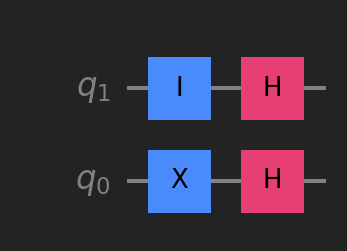

Statevector in ket notation: 


<IPython.core.display.Latex object>

Statevector in vector notation: 


<IPython.core.display.Latex object>

In [3]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # create quantum circuit with 2 qubits
qc.x(0)                 # apply X gate to qubit 0
qc.id(1)                # apply identity to qubit 1
qc.h([0,1])             # apply H gate to qubits 0 and 1
display(qc.draw())

sv = Statevector(qc)
print('Statevector in ket notation: ')
display(sv.draw('latex', prefix='|q\\rangle = '))
print('Statevector in vector notation: ')
display(sv.draw('latex', prefix='|q\\rangle = ', convention='vector'))

In [10]:
import numpy as np
from qiskit.quantum_info import Operator

In [15]:
sv = np.sqrt(1/2)*Statevector.from_label('++') - np.sqrt(1/2)*Statevector.from_label('--')
sv

<IPython.core.display.Latex object>